In [1]:
#Importing some necessary packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

### Define functions

In [2]:
# A function that allows us to drop rows based on values we think are suspect

def drop_rows(df, colname, val):
    return df[df[colname] != val]

In [3]:
# A function to take columns with years (yr_built, yr_renovated) and bin them by decade

from sklearn.preprocessing import LabelEncoder

def bin_by_decade(df, colname):
    bins = pd.IntervalIndex.from_tuples([(1900, 1909), (1910, 1919), (1920, 1929), (1930, 1939), (1940, 1949), (1950, 1959), (1960, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000, 2010), (2010, 2020)])
    series = pd.cut(df[colname], bins)
    df[colname] = series
    return df

In [4]:
# Contains all of our data cleaning operations

def clean():
    
# Load the data
    
    house = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')
    
# Get rid of rows
    # The row with 33 bedrooms is a suspicious outlier, so we decided to drop it
    # The 454 ?s in sqft_basement needed to be remedied. We chose to drop them--454 seemed like too many to impute. 

    clean_house = house[house['bedrooms'] != 33]
    clean_house = clean_house[clean_house['sqft_basement'] != "?"]
    
# Bin decades
    
    clean_house = bin_by_decade(clean_house, 'yr_built')
    clean_house = bin_by_decade(clean_house, 'yr_renovated')
    
    
# Get dummies
    # Note: Originally, we dropped waterfront because it had a lot of null values. Get dummies gives you the option to create a dummy for nulls or not.
    # We did that, without the null column
    clean_house = pd.get_dummies(clean_house, columns=(['waterfront', 'view', 'floors', 'bedrooms', 'bathrooms','condition', 'grade','zipcode', 'yr_built', 'yr_renovated']))
    
# Drop id, date, waterfront

    clean_house = clean_house.drop(['id', 'date'], axis=1)
    
# Convert sqft_basement from object to float

    clean_house['sqft_basement'] = clean_house['sqft_basement'].astype(float, inplace=True)

# Return clean_house
    
    return clean_house

### Get clean dataframe

In [5]:
clean_house = clean()


In [6]:
clean_house.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,waterfront_0.0,...,"yr_renovated_(1920, 1929]","yr_renovated_(1930, 1939]","yr_renovated_(1940, 1949]","yr_renovated_(1950, 1959]","yr_renovated_(1960, 1969]","yr_renovated_(1970, 1979]","yr_renovated_(1980, 1989]","yr_renovated_(1990, 1999]","yr_renovated_(2000, 2010]","yr_renovated_(2010, 2020]"
count,2.114200e+04,21142.000000,2.114200e+04,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,...,21142.0,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000
mean,5.405060e+05,2080.942531,1.508757e+04,1789.104437,291.838095,47.560268,-122.213871,1987.302478,12739.322202,0.882651,...,0.0,0.000047,0.000189,0.000709,0.001230,0.001561,0.005345,0.005487,0.009933,0.006196
std,3.680831e+05,918.563816,4.121013e+04,828.413341,442.504364,0.138592,0.140598,685.671655,27169.859971,0.321844,...,0.0,0.006877,0.013754,0.026627,0.035047,0.039478,0.072914,0.073871,0.099170,0.078474
min,7.800000e+04,370.000000,5.200000e+02,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,1430.000000,5.043000e+03,1200.000000,0.000000,47.471225,-122.328000,1490.000000,5100.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,1910.000000,7.620000e+03,1560.000000,0.000000,47.572000,-122.230000,1840.000000,7626.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,2550.000000,1.069575e+04,2210.000000,560.000000,47.678175,-122.125000,2360.000000,10087.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split the data into training and test sets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split data into train and test sets

X = clean_house.drop(["price"], axis=1) #predictors
y = clean_house["price"] #target

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
print(len(X_test), len(X_train), len(y_test), len(y_train))

4229 16913 4229 16913


### Regression 1: Manual scaling and feature selection

In [15]:
# copied function from Model Fit Linear Regression Lab

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [16]:
target = clean_house["price"]
predictors = clean_house.drop(["price"], axis=1)

result = stepwise_selection(predictors, target, verbose = True)
print('resulting features:')
print(result)

Add  floors_1.0                     with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  view_0.0                       with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  zipcode_98004                  with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  waterfront_1.0                 with p-value 0.0
Add  zipcode_98039                  with p-value 2.09874e-299
Add  zipcode_98112                  with p-value 3.60211e-252
Add  zipcode_98040                  with p-value 9.04221e-201
Add  grade_13                       with p-value 6.8697e-204
Add  grade_12                       with p-value 5.54005e-214
Add  grade_11                       with p-value 2.5854e-186
Add  grade_10                       with p-value 5.09136e-200
Add  grade_9                        with p-value 5.46722e-126
Add  zipcode_98105           

In [10]:
import statsmodels.api as sm
from sklearn import preprocessing

# Used Scikitlearn's Standard Scaler
    # Takes each data point, subtracts the mean of the sample, then divides by the standard deviation of the sample

ss_scaler = preprocessing.StandardScaler()
clean_house_ss = ss_scaler.fit_transform(clean_house)

# Standard scaler returns a numpy array, so we converted it back to a DF

clean_house_ss = pd.DataFrame(clean_house_ss, columns=list(clean_house.columns))

# We generated a list of features to use using a stepwise selection function from Flatiron's learn.co lessons
    # Finds the best p values from your features
    # Note: The resulting list contains 79 of the original 135 features

clean_house_selections_list = ['price','sqft_living15', 'view_0.0', 'sqft_basement', 'zipcode_98004', 'sqft_above', 'sqft_living', 'lat', 'waterfront_1.0', 'zipcode_98039', 'zipcode_98112', 'zipcode_98040', 'grade_13', 'grade_12', 'grade_11', 'grade_10', 'grade_9', 'zipcode_98105', 'zipcode_98119', 'condition_5', 'zipcode_98109', 'zipcode_98199', 'view_4.0', 'zipcode_98033', 'zipcode_98103', 'zipcode_98102', 'zipcode_98122', 'zipcode_98115', 'zipcode_98117', 'zipcode_98116', 'zipcode_98107', 'zipcode_98006', 'zipcode_98144', 'zipcode_98005', 'zipcode_98136', 'zipcode_98008', 'yr_renovated_(2000, 2010]', 'bathrooms_7.75', 'zipcode_98029', 'zipcode_98052', 'condition_4', 'bathrooms_8.0', 'zipcode_98126', 'view_3.0', 'zipcode_98027', 'bathrooms_6.0', 'zipcode_98007', 'zipcode_98118', 'bathrooms_4.75', 'yr_built_(2010, 2020]', 'zipcode_98053', 'zipcode_98074', 'sqft_lot', 'zipcode_98075', 'zipcode_98034', 'zipcode_98125', 'zipcode_98177', 'floors_3.0', 'grade_8', 'floors_2.0', 'bathrooms_4.25', 'bedrooms_3', 'bathrooms_3.25', 'zipcode_98106', 'yr_renovated_(2010, 2020]', 'bathrooms_3.75', 'bathrooms_4.5', 'bedrooms_7', 'bathrooms_4.0', 'bathrooms_5.5', 'bathrooms_5.25', 'yr_built_(1930, 1939]', 'bathrooms_5.0', 'bathrooms_6.25', 'yr_renovated_(1990, 1999]', 'zipcode_98023', 'zipcode_98178', 'zipcode_98198', 'bedrooms_6', 'floors_2.5', 'bedrooms_10', 'yr_built_(1920, 1929]', 'zipcode_98024', 'zipcode_98146', 'zipcode_98133', 'zipcode_98108', 'zipcode_98045', 'zipcode_98010', 'bathrooms_5.75', 'bedrooms_9', 'bedrooms_5', 'sqft_lot15', 'condition_1', 'bathrooms_2.25', 'bathrooms_1.0', 'zipcode_98059', 'zipcode_98056', 'zipcode_98072', 'zipcode_98038', 'zipcode_98065', 'zipcode_98022', 'long', 'bathrooms_3.0']
print("The number of features used in the model is:", len(clean_house_selections_list))

# Made a new DF with just the features from our selections list
clean_house_selections = clean_house[clean_house_selections_list]

# # Used statsmodels OLS so we could get a handy summary of the regression results
target = clean_house_selections["price"]
predictors = clean_house_selections.drop(["price"], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


The number of features used in the model is: 103


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1122.
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        14:41:27   Log-Likelihood:            -2.8136e+05
No. Observations:               21142   AIC:                         5.629e+05
Df Residuals:                   21040   BIC:                         5.637e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -2.57e+07   2.27e+06    -11.331      0.000   -3.01e+07   -2.13e+07
sqft_living15                24.1199      2.670      9.035      0.000      18.887      29.352
view_0.0                  -7.704e+04   4415.926    -17.446      0.000   -8.57e+04   -6.84e+04
sqft_basement                24.4305      1.940     12.595      0.000      20.629      28.232
zipcode_98004              6.725e+05   8822.451     76.229      0.000    6.55e+05     6.9e+05
sqft_above                   65.2309      1.754     37.181      0.000      61.792      68.670
sqft_living                  89.8572      1.563     57.487      0.000      86.793      92.921
lat                         3.26e+05    1.2e+04     27.193      0.000    3.03e+05     3.5e+05
waterfront_1.0             6.026e+05   1.51e+04     39.851      0.000    5.73e+05    6.32e+05
zipcode_98039              1.069e+06   2.16e+04     49.479      0.000    1.03e+06    1.11e+06
zipcode_98112              5.275e+05   9824.719     53.693      0.000    5.08e+05    5.47e+05
zipcode_98040              4.282e+05   9387.914     45.615      0.000     4.1e+05    4.47e+05
grade_13                   1.532e+06    4.7e+04     32.601      0.000    1.44e+06    1.62e+06
grade_12                   7.555e+05   1.82e+04     41.544      0.000     7.2e+05    7.91e+05
grade_11                   3.952e+05   9831.142     40.198      0.000    3.76e+05    4.14e+05
grade_10                    2.16e+05   6418.174     33.652      0.000    2.03e+05    2.29e+05
grade_9                      9.9e+04   4488.147     22.058      0.000    9.02e+04    1.08e+05
zipcode_98105              3.711e+05   1.05e+04     35.388      0.000    3.51e+05    3.92e+05
zipcode_98119              3.929e+05   1.19e+04     33.094      0.000     3.7e+05    4.16e+05
condition_5                7.755e+04   3998.787     19.393      0.000    6.97e+04    8.54e+04
zipcode_98109              3.999e+05   1.49e+04     26.911      0.000    3.71e+05    4.29e+05
zipcode_98199              2.738e+05   9535.804     28.715      0.000    2.55e+05    2.93e+05
view_4.0                   2.172e+05    1.1e+04     19.736      0.000    1.96e+05    2.39e+05
zipcode_98033              2.507e+05   7786.433     32.194      0.000    2.35e+05    2.66e+05
zipcode_98103              2.305e+05   7577.168     30.416      0.000    2.16e+05    2.45e+05
zipcode_98102              3.877e+05   1.53e+04     25.392      0.000    3.58e+05    4.18e+05
zipcode_98122              2.576e+05   9352.651     27.543      0.000    2.39e+05    2.76e+05
zipcode_98115              2.201e+05   7263.128     30.299      0.000    2.06e+05    2.34e+05
zipcode_98117              1.971e+05   7872.049     25.034      0.000    1.82e+05    2.12e+05
zipcode_98116              2.041e+05   9214.394     22.150      0.000    1.

### Model Validation

In [11]:
# We needed a special train, test, split for our altered data set
target = clean_house_selections["price"]
predictors = clean_house_selections.drop(["price"], axis=1)

X1_train,X1_test,y1_train,y1_test=train_test_split(predictors,target,test_size=0.2,random_state=3)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X1_train, y1_train)

y_hat_train = linreg.predict(X1_train)
y_hat_test = linreg.predict(X1_test)

# predictors_int = sm.add_constant(X1_train)
# model = sm.OLS(y1_train, predictors_int).fit()
# model.summary()

# model.predict(X1_train)


In [12]:
from sklearn.metrics import r2_score

print(r2_score(y1_train, y_hat_train))
print(r2_score(y1_test, y_hat_test))

0.8441525776209711
0.8343855929687907


In [13]:
linreg.coef_

array([ 2.55550097e+01, -7.94692094e+04, -5.18992497e+12,  7.02412249e+05,
       -5.18992497e+12,  5.18992497e+12,  3.26420219e+05,  6.22678204e+05,
        1.06369471e+06,  5.26012019e+05,  4.28849192e+05,  1.56253875e+06,
        7.33803272e+05,  4.12678148e+05,  2.09540323e+05,  9.88402686e+04,
        3.64888996e+05,  4.00458734e+05,  7.54580657e+04,  3.93970283e+05,
        2.63097687e+05,  1.95025176e+05,  2.43203046e+05,  2.30264529e+05,
        3.96337296e+05,  2.54851423e+05,  2.13731934e+05,  1.94584122e+05,
        1.98525867e+05,  2.33866533e+05,  1.86795976e+05,  1.93810764e+05,
        2.22842091e+05,  1.63706657e+05,  1.75918144e+05,  1.64070954e+05,
        2.43930567e+06,  1.69327935e+05,  1.38046333e+05,  2.74077839e+04,
        1.50851285e+06,  1.13055417e+05,  8.20519248e+04,  1.23402144e+05,
        6.81647462e+05,  1.79907283e+05,  9.38353050e+04,  4.08567805e+05,
        4.51832860e+04,  1.18264234e+05,  1.03241086e+05,  2.46093750e-01,
        1.09561631e+05,  

In [14]:
 # convert standardized coefficients to unstandardized

# for ind, val in enumerate(model.params):
#     print(predictors.loc[ind], val * (target.std()/predictors.loc[ind].std()))

# for ind, val in enumerate(linreg.coef_):
#         print(list(predictors.columns)[ind], (val * ((target.std())/(predictors.iloc[:,ind].std()))))

for ind, val in enumerate(linreg.coef_):
    print(list(predictors.columns)[ind], val)

sqft_living15 25.55500965950361
view_0.0 -79469.20940734063
sqft_basement -5189924969874.034
zipcode_98004 702412.2486721389
sqft_above -5189924969831.979
sqft_living 5189924969986.828
lat 326420.2186096382
waterfront_1.0 622678.2038991093
zipcode_98039 1063694.714040028
zipcode_98112 526012.0185241699
zipcode_98040 428849.1916503906
grade_13 1562538.7511138916
grade_12 733803.2720031738
grade_11 412678.14825439453
grade_10 209540.32299804688
grade_9 98840.2685546875
zipcode_98105 364888.99559020996
zipcode_98119 400458.73445892334
condition_5 75458.06567382812
zipcode_98109 393970.2834701538
zipcode_98199 263097.6867752075
view_4.0 195025.1756591797
zipcode_98033 243203.0460510254
zipcode_98103 230264.5291748047
zipcode_98102 396337.295589447
zipcode_98122 254851.42321777344
zipcode_98115 213731.93389892578
zipcode_98117 194584.1220703125
zipcode_98116 198525.86669921875
zipcode_98107 233866.53289794922
zipcode_98006 186795.97583007812
zipcode_98144 193810.7635192871
zipcode_98005 222

In [15]:
# Check the mean squared error

from math import sqrt

mse_train = sqrt(np.sum((y1_train-y_hat_train)**2)/len(y_train))
mse_test = sqrt(np.sum((y1_test-y_hat_test)**2)/len(y_test))
print('Train Root Mean Squared Error:', mse_train)
print('Test Root Mean Squared Error:', mse_test)

Train Root Mean Squared Error: 147476.90746021748
Test Root Mean Squared Error: 140479.12678302787


In [16]:
# Mean absolute error

print(mean_absolute_error(y1_train, y_hat_train))
print(mean_absolute_error(y1_test, y_hat_test))

NameError: name 'mean_absolute_error' is not defined

In [17]:
# Cross validation scores
    # Took the mean cv score because cross_val_score returns a score for each fold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [18]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-25480638351.64048
-25254109870.948112
-24943706654.96158


### Regression 2: Lasso

In [19]:
from sklearn.linear_model import Lasso

In [20]:
# Lasso Regression
    # Lasso helps prevent overfitting by reducing the influence of some of the predictors by penalizing their coefficients or reducing them to zero (effectively doing predictor selection)

lasso = Lasso()
lasso.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1]:
# Checking the training/test scores (R2) of our model 

train_score_l=lasso.score(X_train,y_train)
test_score_l=lasso.score(X_test,y_test)
print("training score:", train_score_1)
print("test score: ", test_score_1)

NameError: name 'lasso' is not defined

In [22]:
print("training score:", train_score)
print("test score: ", test_score)

training score: 0.8452251807645014
test score:  0.8334798515592583


In [2]:
# Checking to see how many features were used and how many were axed

coeff_used = np.sum(lasso.coef_!=0)
print("number of features used:", coeff_used)
print("number eliminated:", len(list(clean_house.columns)) - coeff_used)

NameError: name 'np' is not defined

In [49]:
# Mean Squared Error

y_hat_train = lasso.predict(X_train)
y_hat_test = lasso.predict(X_test)

mse_train = sqrt(np.sum((y_train-y_hat_train)**2)/len(y_train))
mse_test = sqrt(np.sum((y_test-y_hat_test)**2)/len(y_test))
print('Train Root Mean Squared Error:', mse_train)
print('Test Root Mean Squared Error:', mse_test)

Train Root Mean Squared Error: 146968.53425713073
Test Root Mean Squared Error: 140862.74157102205


In [50]:
# Mean absolute error

mae = mean_absolute_error(y_hat_test, y1_test)
mae

540043.3042396021

In [25]:
# Cross Validation

cv_5_results = np.mean(cross_val_score(lasso, X, y, cv=5, scoring="r2"))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [27]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

0.811339090296942
-25254109870.948112
-24943706654.96158


In [28]:

for ind, val in enumerate(lasso.coef_):
    print(list(X.columns)[ind], val) 

sqft_living 145.62647548342954
sqft_lot 0.24895053958500307
sqft_above 8.206130386773722
sqft_basement -36.84358144960302
lat 335554.1299415039
long -226775.9705883293
sqft_living15 25.042826753658574
sqft_lot15 -0.15936592033505292
waterfront_0.0 2774.6804298142233
waterfront_1.0 628727.1181339335
view_0.0 -43950.59464391824
view_1.0 49753.90980356082
view_2.0 32780.61303818093
view_3.0 119134.92015041443
view_4.0 229859.35699367072
floors_1.0 26583.843911590135
floors_1.5 13888.889099119882
floors_2.0 -6396.905007715505
floors_2.5 59650.48327074084
floors_3.0 -62375.440341383975
floors_3.5 82498.73415213764
bedrooms_1 5549.173374353759
bedrooms_2 9177.908903635926
bedrooms_3 20526.01966496341
bedrooms_4 7511.349596647141
bedrooms_5 -13219.378492421332
bedrooms_6 -32993.19737640615
bedrooms_7 -155119.52015236573
bedrooms_8 2573.321702888958
bedrooms_9 -62568.0188169999
bedrooms_10 -255935.78121828308
bedrooms_11 -60783.34551405056
bathrooms_0.5 -54091.59981453757
bathrooms_0.75 -75707

In [54]:
lasso_coef = pd.DataFrame(np.round_(lasso.coef_, decimals=3), X.columns, columns=["penalized_coefficents"])

In [55]:
lasso_coef

,penalized_coefficents
sqft_living,145.626
sqft_lot,0.249
sqft_above,8.206
sqft_basement,-36.844
lat,335554.130
long,-226775.971
sqft_living15,25.043
sqft_lot15,-0.159
waterfront_0.0,2774.680
waterfront_1.0,628727.118


[Text(0.5, 0, 'Penalized Regression Coefficents, Lasso')]

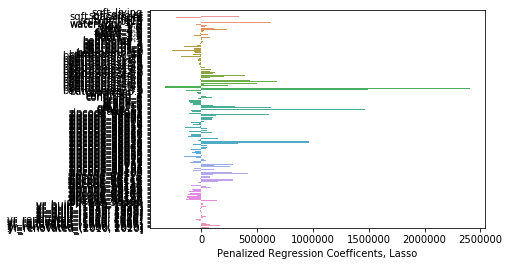

In [59]:
import seaborn as sns 

lasso_coef =lasso_coef[lasso_coef["penalized_coefficents"]!=0]
lasso_coef.sort_values(by="penalized_coefficents", ascending=False)

ax = sns.barplot(x="penalized_coefficents", y=lasso_coef.index, data=lasso_coef)
ax.set(xlabel='Penalized Regression Coefficents, Lasso')

### Regression 3: Ridge

In [3]:
from sklearn.linear_model import Ridge

In [4]:
# An important difference between Lasso and Ridge is that Ridge doesn't reduce any features' coefficient to 0 (though they can get very, very small)

ridge = Ridge()
ridge.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [5]:
# Getting the scores

rtrain_score=ridge.score(X_train,y_train)
rtest_score=ridge.score(X_test,y_test)

NameError: name 'X_train' is not defined

In [32]:
print("training score:", rtrain_score)
print("test score: ", rtest_score)

training score: 0.8444136842588941
test score:  0.8342792838684019


In [33]:
# Mean Squared Error

y_hat_train = ridge.predict(X_train)
y_hat_test = ridge.predict(X_test)

mse_train = sqrt(np.sum((y_train-y_hat_train)**2)/len(y_train))
mse_test = sqrt(np.sum((y_test-y_hat_test)**2)/len(y_test))
print('Train Root Mean Squarred Error:', mse_train)
print('Test Root Mean Squarred Error:', mse_test)

Train Root Mean Squarred Error: 147353.3143293604
Test Root Mean Squarred Error: 140524.2068398709


In [34]:
# Mean absolute error

mse = mean_absolute_error(y_hat_test, y1_test)
mse

85998.30724342703

In [35]:
# Cross Validation

cv_5_results = np.mean(cross_val_score(ridge, X, y, cv=5, scoring="r2"))
cv_10_results = np.mean(cross_val_score(ridge, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(ridge, X, y, cv=20, scoring="neg_mean_squared_error"))

In [36]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

0.8236882414766631
-23805221547.516357
-23552399582.42856


In [68]:
for ind, val in enumerate(ridge.coef_):
    print(list(X.columns)[ind], val)

sqft_living 91.39510310740154
sqft_lot 0.2463860388384321
sqft_above 68.88060687597456
sqft_basement 22.515611863517663
lat 360754.3606934628
long -217973.31893912962
sqft_living15 24.456431085426313
sqft_lot15 -0.16003728994013963
waterfront_0.0 2718.19512854387
waterfront_1.0 613658.8954972586
view_0.0 -52438.76615760895
view_1.0 40639.20250803924
view_2.0 23769.65491921983
view_3.0 111419.29279650294
view_4.0 231799.7165921277
floors_1.0 8468.599439401874
floors_1.5 -5019.965622128853
floors_2.0 -24829.037721596775
floors_2.5 42920.660436631915
floors_3.0 -77966.68361111003
floors_3.5 56426.427077898974
bedrooms_1 53006.65562422376
bedrooms_2 58296.65141295923
bedrooms_3 68837.77694768822
bedrooms_4 54281.78637491736
bedrooms_5 32883.685013893024
bedrooms_6 19092.119509213444
bedrooms_7 -90063.02476183322
bedrooms_8 51815.02484028775
bedrooms_9 -67508.37231951825
bedrooms_10 -163449.66021652715
bedrooms_11 -17192.64242467128
bathrooms_0.5 -154589.03450415912
bathrooms_0.75 -220358.2

### Try Gridsearch for best alpha

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'alpha': [1, 5, 10, 20, 25, 30, 35]}

In [ ]:
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X, y)

print('Best parameters:', lasso_regressor.best_params_)
print('Best score:', lasso_regressor.best_score_)

In [ ]:
lasso = Lasso(alpha = 20)
lasso.fit(X_train, y_train)

In [ ]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

In [ ]:
print("training score:", train_score)
print("test score: ", test_score)

In [ ]:
coeff_used = np.sum(lasso.coef_!=0)
print("number of features used:", coeff_used)
print("number eliminated:", len(list(clean_house.columns)) - coeff_used)

In [ ]:
# Mean Squared Error
y_hat_train = lasso.predict(X_train)
y_hat_test = lasso.predict(X_test)

mse_train = sqrt(np.sum((y_train-y_hat_train)**2)/len(y_train))
mse_test = sqrt(np.sum((y_test-y_hat_test)**2)/len(y_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

In [ ]:
# Mean absolute error

mse = mean_absolute_error(y_hat_test, y1_test)
mse

In [ ]:
# Cross Validation

cv_5_results = np.mean(cross_val_score(lasso, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(lasso, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(lasso, X, y, cv=20, scoring="neg_mean_squared_error"))

In [ ]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

In [ ]:
for ind, val in enumerate(lasso.coef_):
    print(list(X.columns)[ind], val)